In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

%matplotlib inline

In [2]:
files = glob.glob('*csv')
files

['11_8.csv',
 '25_3.csv',
 '31_5.csv',
 '33_2.csv',
 '35_1.csv',
 '35_6.csv',
 '41_7.csv',
 '41_8.csv',
 '7_2.csv']

In [3]:
data = pd.read_csv(files[0])

In [4]:
def convert_to_hour(data):
    hour_datas = []
    for i in range(len(data) // 60):
        hour_data = data[i*60:i*60+60].mean()
        hour_datas.append(hour_data)
    return np.array(hour_datas)

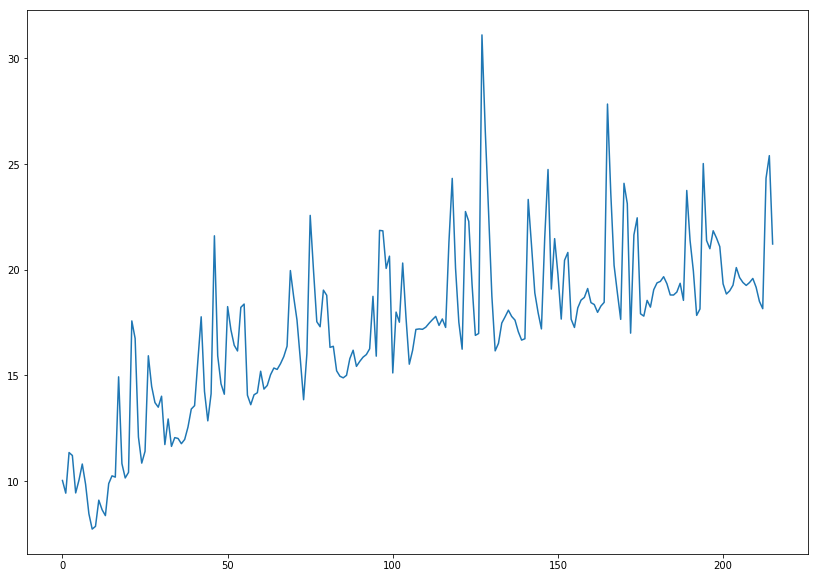

In [5]:
plt.figure(figsize=(14,10))
plt.plot(convert_to_hour(data['electricCurrent0']))
plt.show()

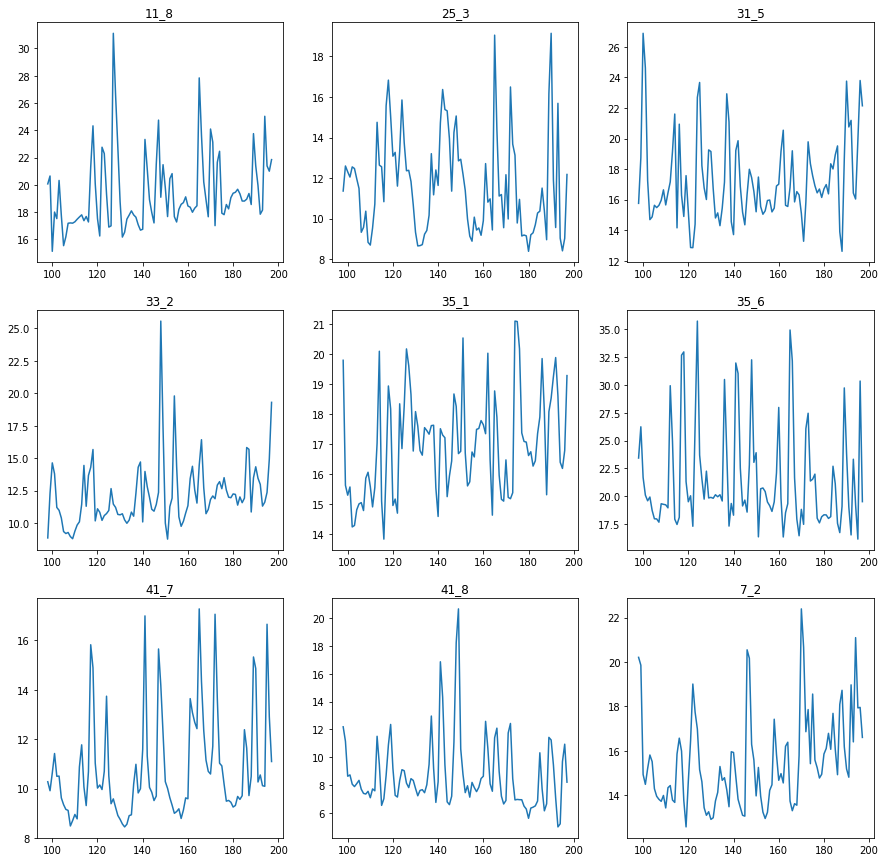

In [6]:
plt.figure(figsize=(15,15))
for i in range(len(files)):
    plt.subplot(3,3,i+1)
    data = pd.read_csv(files[i])
    plt.plot(range(98, 198), convert_to_hour(data['electricCurrent0'])[98:198])
    plt.title(files[i].split('.')[0])

In [7]:
# files.pop(5)
# files

In [8]:
datas_h = []
for file in files:
    data = pd.read_csv(file)
    datas_h.append(convert_to_hour(data['electricCurrent0']))
    
datas_h = np.array(datas_h)

datas_h = np.array([a[98:198] for a in datas_h], dtype='float32')
datas_h.shape, datas_h.dtype

((9, 100), dtype('float32'))

In [9]:
def plot_label_h(n_clusters):
    for label in range(n_clusters):
        label_files = [file for file, label_ in zip(files, labels_h) if label_ == label]
        plt.figure(figsize=(15,15))
        plt.suptitle('cluster label ' + str(label),fontsize=20)
        for i, label_file in enumerate(label_files):
            plt.subplot(3,3,i+1)
            data = pd.read_csv(label_file)
            data_h = convert_to_hour(data['electricCurrent0'])
            plt.plot(range(98, 198), data_h[98:198])
            plt.title(label_file.split('.')[0])

In [13]:
def plot_label_box_h(n_clusters):
    for label in range(n_clusters):
        label_files = [file for file, label_ in zip(files, labels_h) if label_ == label]
        plt.figure(figsize=(15,15))
        plt.suptitle('cluster label ' + str(label),fontsize=20)
        for i, label_file in enumerate(label_files):
            plt.subplot(3,3,i+1)
            data = pd.read_csv(label_file)
            sns.boxplot(convert_to_hour(data['electricCurrent0'])[98:198])
            plt.title(label_file.split('.')[0])

In [14]:
from sklearn.cluster import KMeans

cluster_h = KMeans(n_clusters=3)
labels_h = cluster_h.fit_predict(datas_h)
labels_h

array([0, 1, 0, 1, 0, 2, 1, 1, 0])

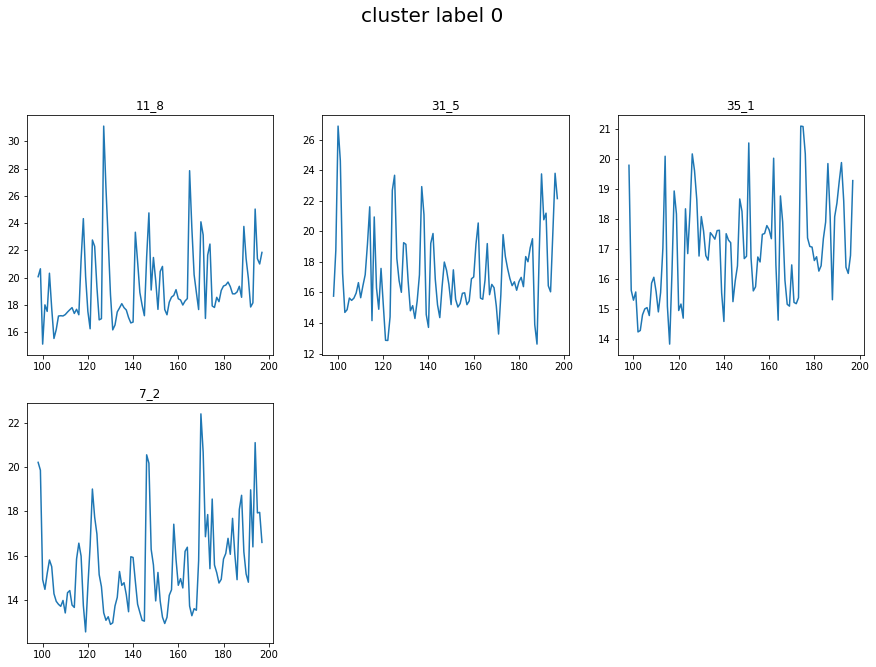

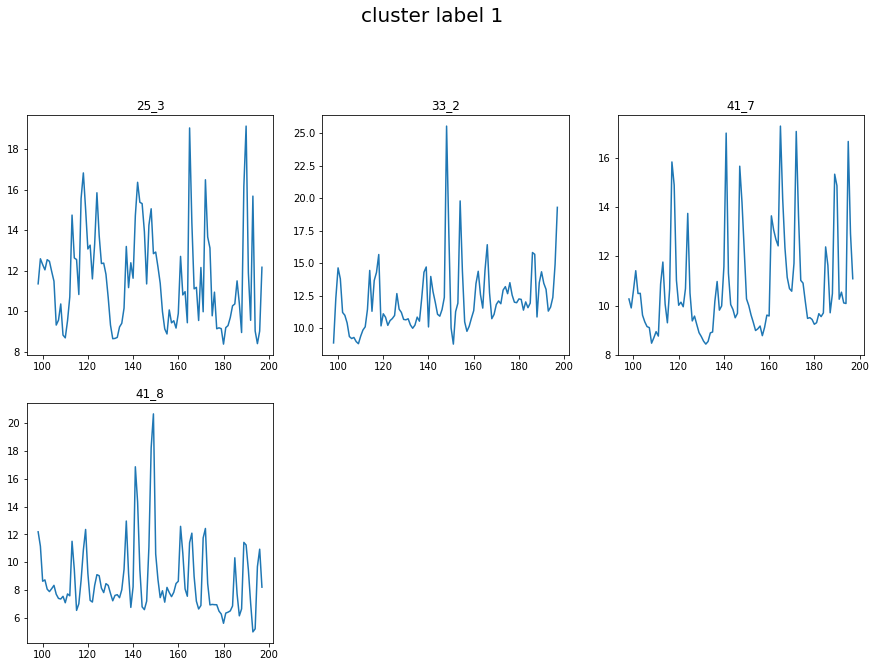

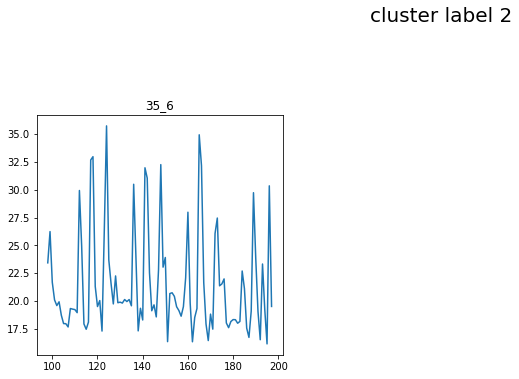

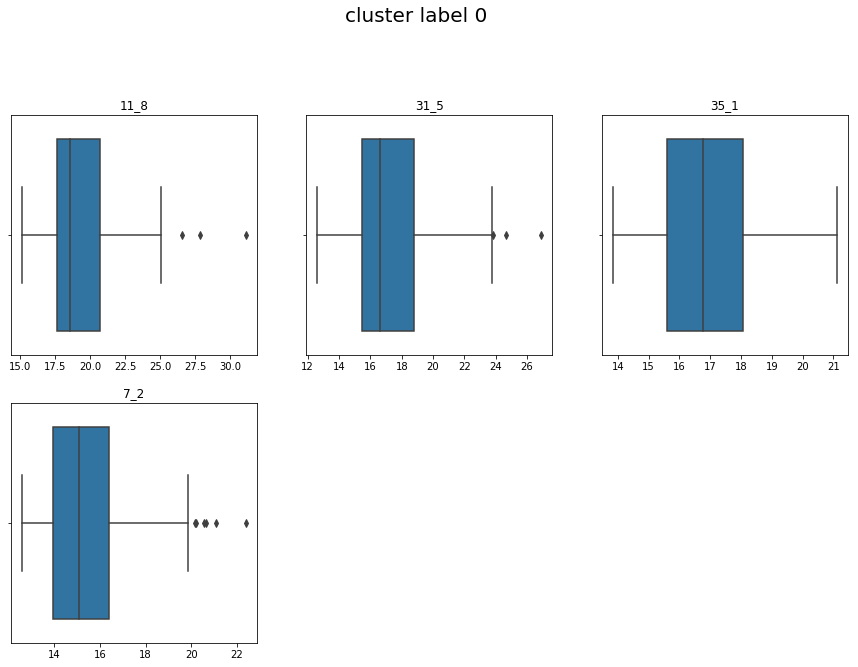

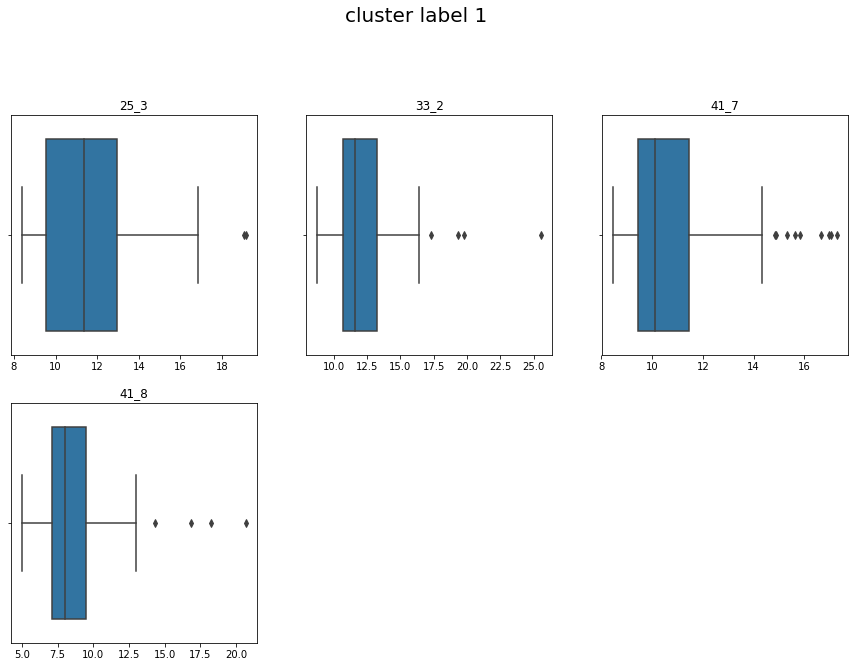

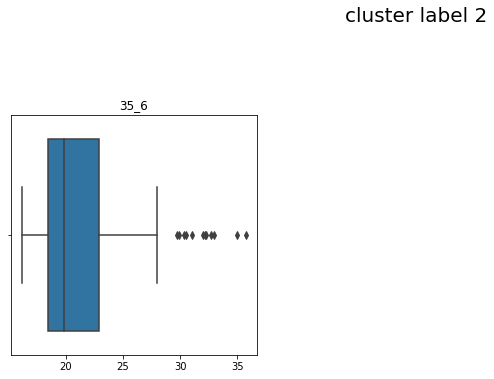

In [15]:
plot_label_h(3)
plot_label_box_h(3)

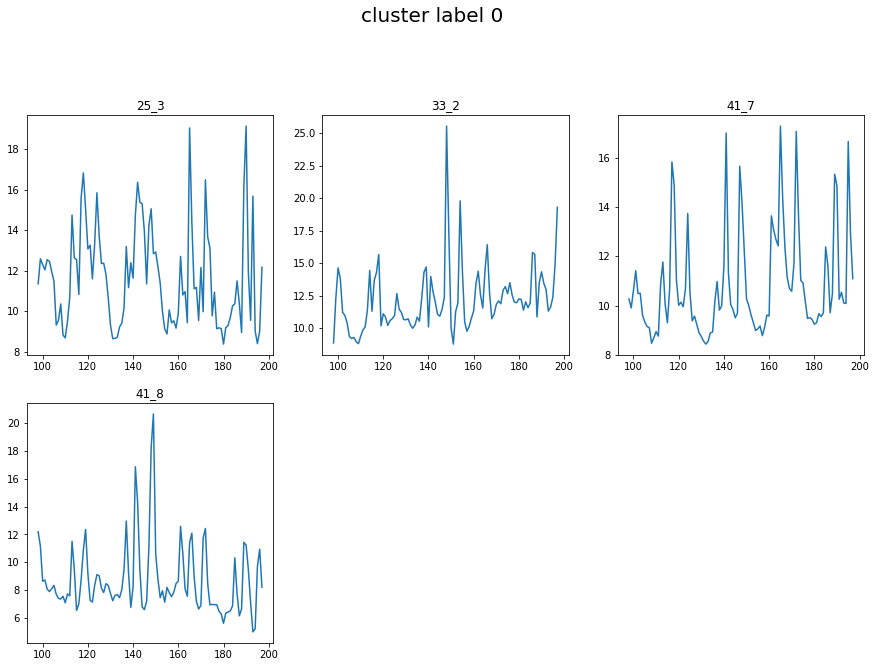

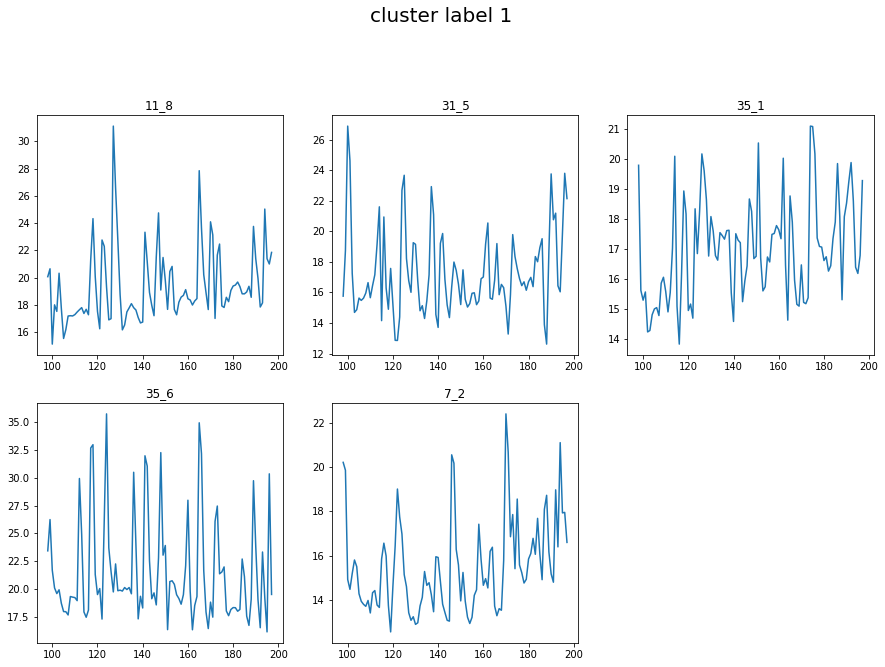

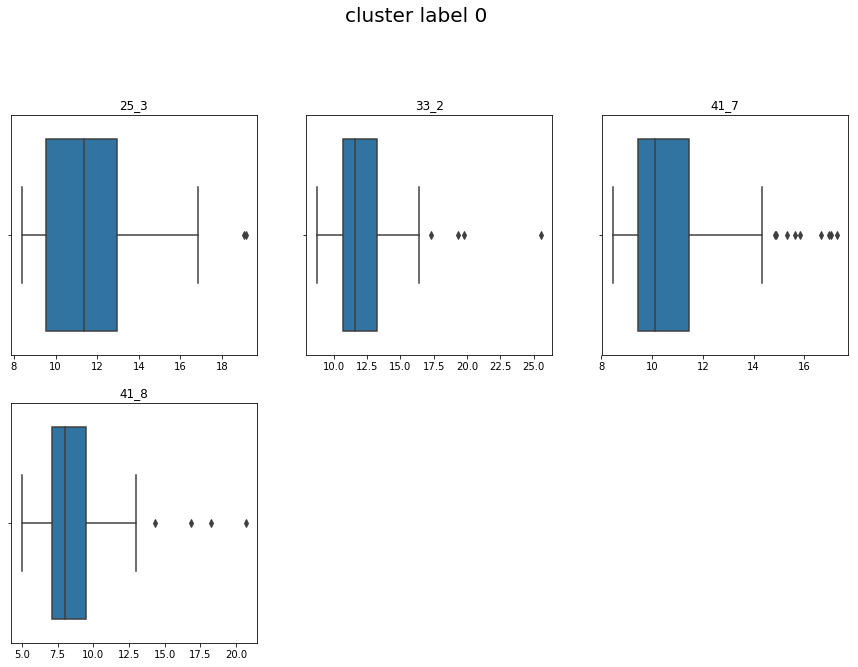

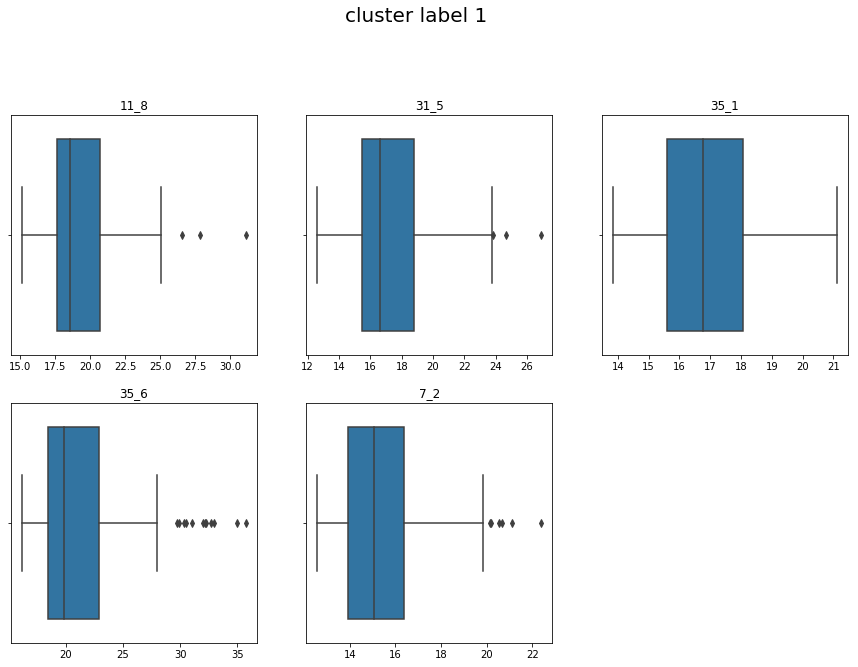

In [16]:
from sklearn.cluster import KMeans

cluster_h2 = KMeans(n_clusters=2)
labels_h = cluster_h2.fit_predict(datas_h)

plot_label_h(2)
plot_label_box_h(2)

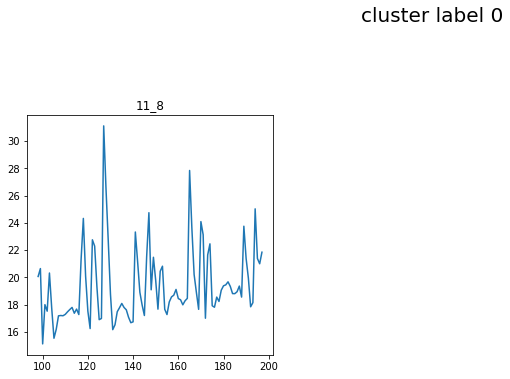

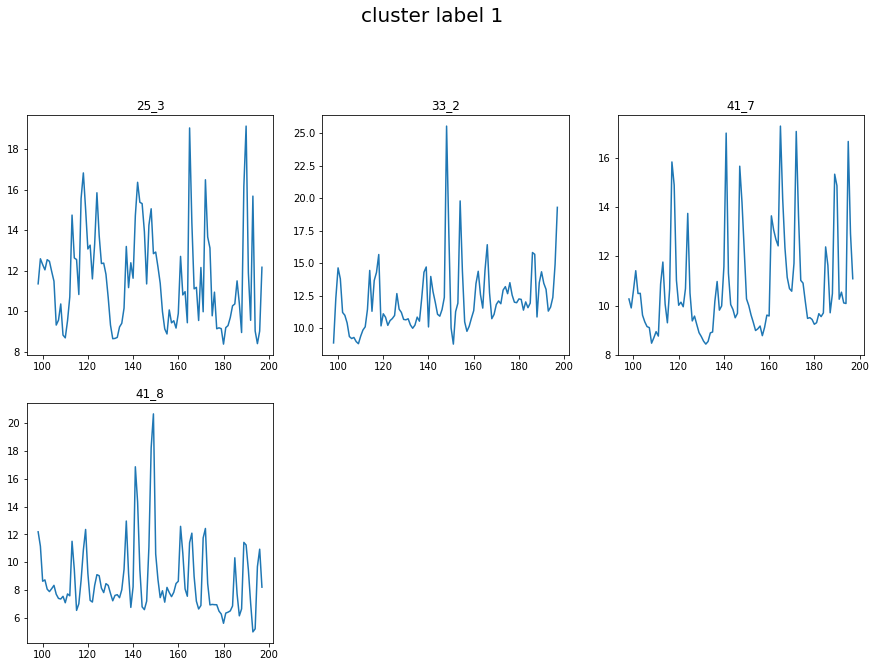

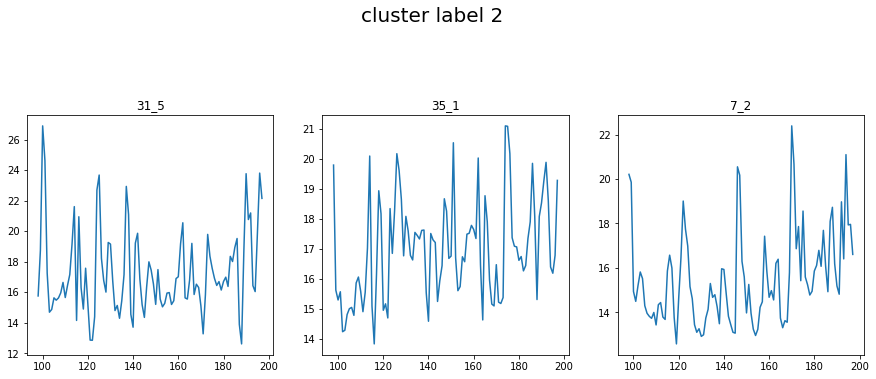

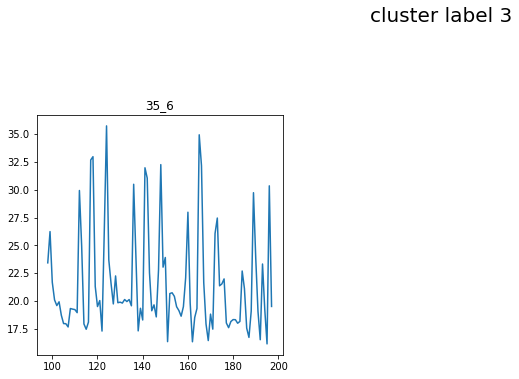

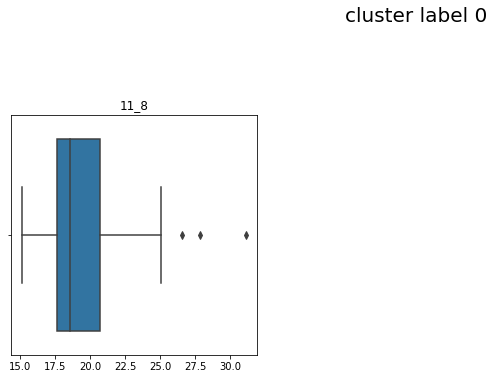

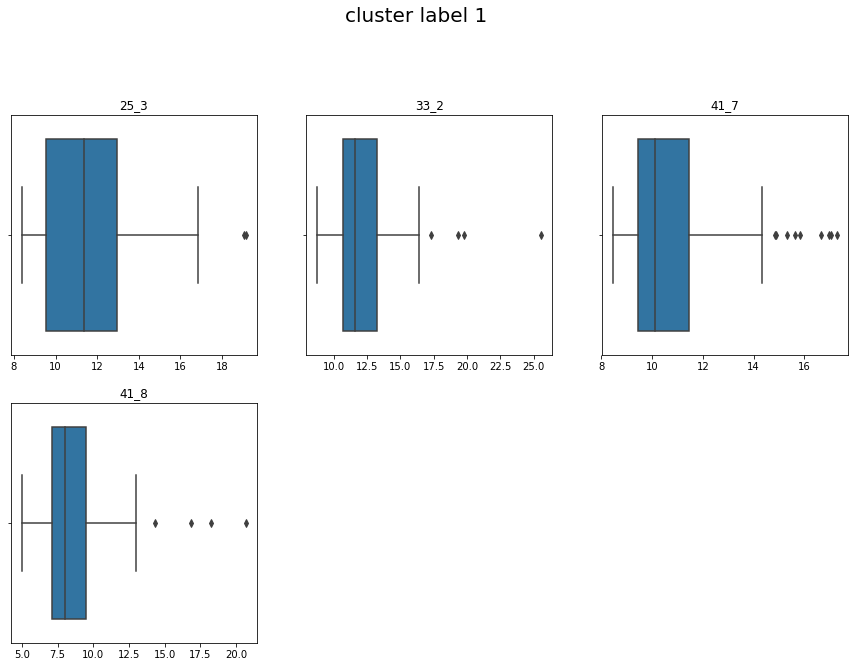

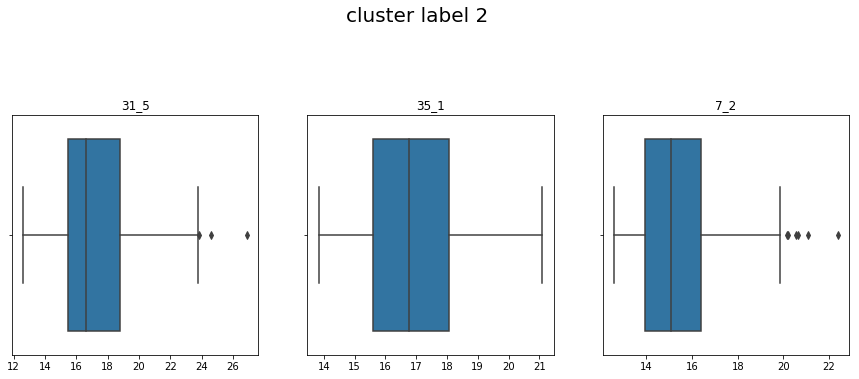

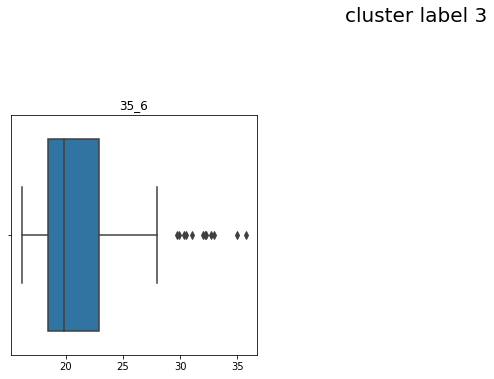

In [17]:
from sklearn.cluster import KMeans

cluster_h3 = KMeans(n_clusters=4)
labels_h = cluster_h3.fit_predict(datas_h)

plot_label_h(4)
plot_label_box_h(4)